In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import sklearn.neighbors, sklearn.preprocessing, sklearn.metrics, sklearn.pipeline, sklearn.svm, sklearn.feature_selection, sklearn.neural_network, sklearn.model_selection
import scipy.stats, scipy.spatial
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('/home/hugo/Thèse/styles.mplstyle')
import seaborn as sns
import identification.dataset
import random
%matplotlib widget

In [5]:
results = pd.read_pickle('../models/results.pkl')

score_columns = ['precision', 'recall', 'fscore', 'roc', 'accuracy']
results['id'] = results.index + 1
results = pd.wide_to_long(results, score_columns, i='id', j='split', suffix='\\S+')
results.clf = results.clf.astype(str)
results[score] = np.rint(results[score] * 100)

In [3]:
colors = ["#42738A", "#F6B32C", "#80A539"]

<>:20: SyntaxWarning: invalid escape sequence '\%'
<>:20: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_108806/1301495868.py:20: SyntaxWarning: invalid escape sequence '\%'
  ax.set_ylabel(score.title() + ' (\%)')
/tmp/ipykernel_108806/1301495868.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['LTAS', 'LTCC', 'MFCC'])


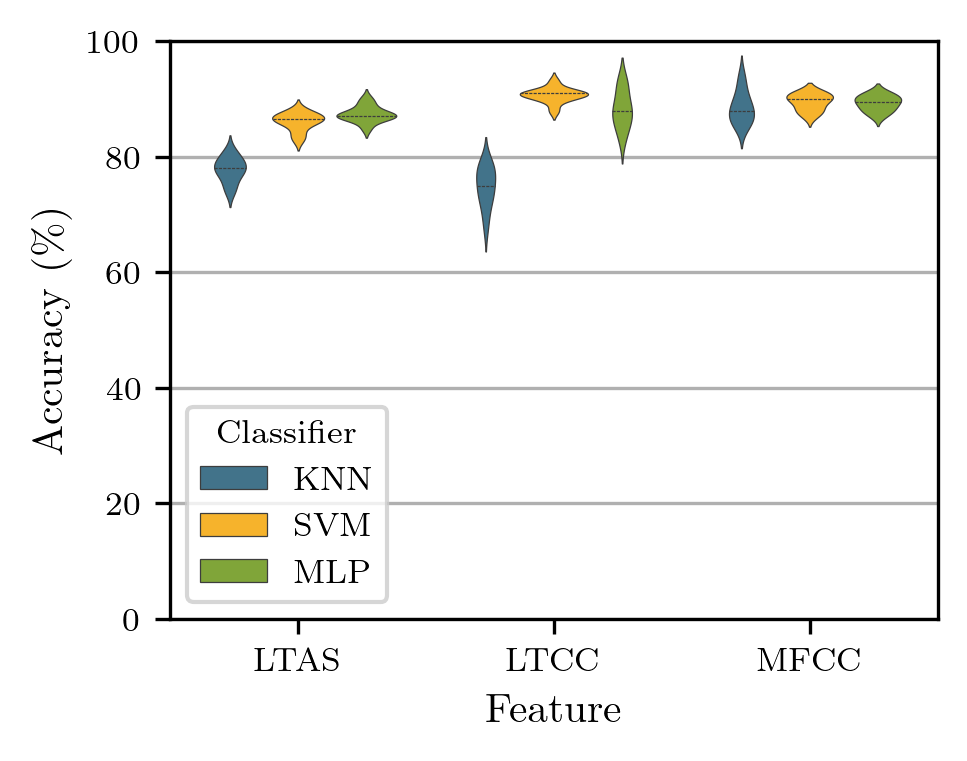

In [6]:
score = 'accuracy'
factors = ['feature', 'clf']

# results[score] = np.rint(results[score] * 100)

# print(results.loc[results.groupby(factors)[score].idxmax()])

# agg = pd.DataFrame()
# agg['mean'] = results.groupby(factors)[score].max()
# # agg['std'] = results.groupby(factors)[score].std()
# agg = agg.reset_index()
# agg = agg.pivot(columns=factors[1], index=factors[0], values='mean')

# Plots
fig, ax = plt.subplots()
sns.violinplot(x='feature', y=score, data=results, hue='clf', inner="quart", linewidth=.3, common_norm=True, palette=colors, saturation=1)

ax.set_xticklabels(['LTAS', 'LTCC', 'MFCC'])
ax.set_xlabel("Feature")
ax.set_ylabel(score.title() + ' (\%)')

for l in ax.lines:
    if l._dash_pattern[1][0] != 0.75:
        l.remove()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, title='Classifier', labels=['KNN', 'SVM', 'MLP'])
ax.grid(axis = 'y')
ax.set_ylim([0, 100])

plt.savefig(f'../reports/figures/accuracy-cnsm.png')